In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
aug_train=pd.read_csv('aug_train.csv')
aug_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [6]:
aug_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# check null values 

In [6]:
rows_null=aug_train.isnull().sum()/len(aug_train)*100

In [8]:
rows_null=aug_train.isnull().sum(axis=1)/aug_train.shape[1]*100

In [9]:
rows_null

0        14.285714
1         0.000000
2        21.428571
3        21.428571
4         0.000000
           ...    
19153    14.285714
19154    14.285714
19155     0.000000
19156     7.142857
19157    28.571429
Length: 19158, dtype: float64

In [19]:
rows_null<5

0        False
1         True
2        False
3        False
4         True
         ...  
19153    False
19154    False
19155     True
19156    False
19157    False
Length: 19158, dtype: bool

In [20]:
rows_null.reset_index()

,index,0
0,0,14.285714
1,1,0.000000
2,2,21.428571
3,3,21.428571
4,4,0.000000
...,...,...
19153,19153,14.285714
19154,19154,14.285714
19155,19155,0.000000
19156,19156,7.142857


In [22]:
rows_null[rows_null>5]

0        14.285714
2        21.428571
3        21.428571
5        21.428571
6         7.142857
           ...    
19151    21.428571
19153    14.285714
19154    14.285714
19156     7.142857
19157    28.571429
Length: 10203, dtype: float64

In [24]:
null_index=rows_null[rows_null>5].index
null_index

Index([    0,     2,     3,     5,     6,     9,    10,    13,    14,    16,
       ...
       19140, 19142, 19144, 19145, 19148, 19151, 19153, 19154, 19156, 19157],
      dtype='int64', length=10203)

In [25]:
#drop() for dropping rows or columns

aug_train.drop(null_index)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


In [28]:
aug_train.drop(columns='enrollee_id') #helps to remove required columns

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [29]:
# dropna() : helps to remove rows having any null values
#might loss data
aug_train.dropna()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


In [30]:
aug_train.isnull().sum()/aug_train.shape[0]*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [31]:
aug_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# Imputation

In [32]:
#for categorical columns
# fillna : to fill values over null data
aug_train.gender.mode()[0]

'Male'

In [33]:
aug_train.gender.fillna(aug_train.gender.mode()[0])

0        Male
1        Male
2        Male
3        Male
4        Male
         ... 
19153    Male
19154    Male
19155    Male
19156    Male
19157    Male
Name: gender, Length: 19158, dtype: object

In [34]:
# ffill: forward filling
#bfill : backward filling
aug_train.gender.fillna(method= 'ffill')

C:\Users\ACER\AppData\Local\Temp\ipykernel_15240\2988776921.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aug_train.gender.fillna(method= 'ffill')


0        Male
1        Male
2        Male
3        Male
4        Male
         ... 
19153    Male
19154    Male
19155    Male
19156    Male
19157    Male
Name: gender, Length: 19158, dtype: object

In [38]:
aug_train.gender.bfill()

0        Male
1        Male
2        Male
3        Male
4        Male
         ... 
19153    Male
19154    Male
19155    Male
19156    Male
19157     NaN
Name: gender, Length: 19158, dtype: object

In [39]:
aug_train.gender.fillna('others')

0          Male
1          Male
2        others
3        others
4          Male
          ...  
19153      Male
19154      Male
19155      Male
19156      Male
19157    others
Name: gender, Length: 19158, dtype: object

In [42]:
ipl_new=pd.read_csv("IPL Matches 2008-2020.csv")
ipl_new.isnull()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
812,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
813,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
814,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [43]:
ipl_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [45]:
ipl_new.result_margin

0      140.0
1       33.0
2        9.0
3        5.0
4        5.0
       ...  
811      NaN
812     57.0
813      6.0
814     17.0
815      5.0
Name: result_margin, Length: 816, dtype: float64

# for numeric or continues data
- mean
- median

In [46]:
mean_of_ipl=ipl_new.result_margin.mean()
median_of_ipl=ipl_new.result_margin.median()

In [50]:
mean_rs=ipl_new.result_margin.fillna(mean_of_ipl)
median_rs=ipl_new.result_margin.fillna(median_of_ipl)

<Axes: xlabel='result_margin'>

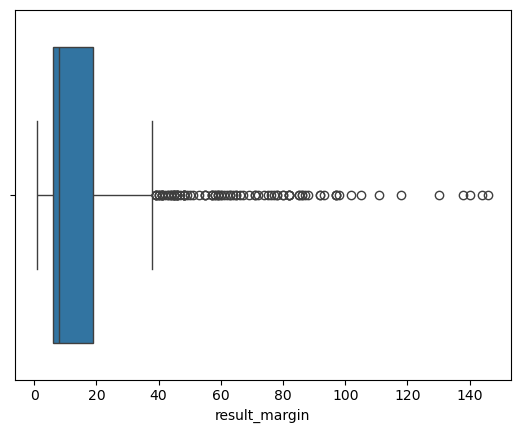

In [51]:
sns.boxplot(x= mean_rs)

<Axes: xlabel='result_margin'>

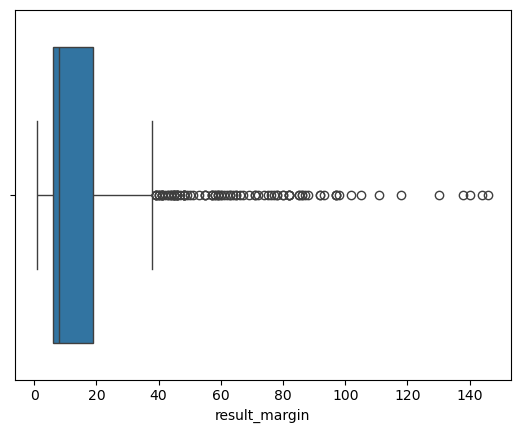

In [52]:
sns.boxplot(x= median_rs)

In [53]:
ipl_new.result_margin.mean()

np.float64(17.321652065081352)

In [54]:
ipl_new.result_margin.median()

8.0

# box plot
- iqr = q3-q2
- min = q1 - 1.5*iqr
- max = q3 + 1.5*iqr

# outlier handling
- adjust outlier data to min or max value

In [60]:
# inplace = True : replace value permanently
ipl_new.result_margin=ipl_new.result_margin.fillna(median_of_ipl)
ipl_new

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,8.0,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [62]:
ipl_new.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin        0
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [63]:
ipl_new.isnull()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
812,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
813,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
814,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


<Axes: xlabel='result_margin'>

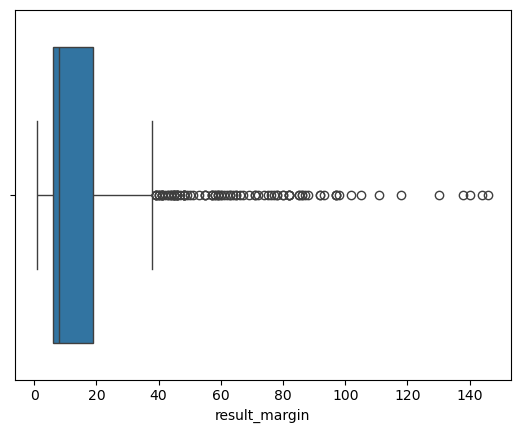

In [64]:
sns.boxplot(ipl_new,x='result_margin')

In [66]:
q1 = ipl_new.result_margin.quantile(0.25)
q1

np.float64(6.0)

In [67]:
q3 = ipl_new.result_margin.quantile(0.75)
q3

np.float64(19.0)

In [68]:
iqr = q3 -q1
iqr

np.float64(13.0)

In [69]:
min = q1 -1.5*iqr
min


np.float64(-13.5)

In [71]:
max = q3 +1.5*iqr
max

np.float64(38.5)

In [74]:
ipl.result_margin[ipl_new.result_margin > max]

0      140.0
9       66.0
18      45.0
37      41.0
41      65.0
       ...  
794     60.0
803     44.0
804     82.0
806     69.0
812     57.0
Name: result_margin, Length: 98, dtype: float64

In [77]:
ipl_new.result_margin[ipl_new.result_margin > max]=max

C:\Users\ACER\AppData\Local\Temp\ipykernel_15240\3940009137.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ipl_new.result_margin[ipl_new.result_margin > max]=max
C:\Users\ACER\AppData\Local\Temp\ipykernel_15240\3940009137.py:1: SettingW

In [78]:
ipl_new.result_margin

0      38.5
1      33.0
2       9.0
3       5.0
4       5.0
       ... 
811     8.0
812    38.5
813     6.0
814    17.0
815     5.0
Name: result_margin, Length: 816, dtype: float64

In [81]:
low_index=ipl_new.result_margin[ipl_new.result_margin<min].index
low_index

Index([], dtype='int64')

In [82]:
ipl_new.loc[low_index,'result_margin']=min

In [83]:
ipl_new.result_margin

0      38.5
1      33.0
2       9.0
3       5.0
4       5.0
       ... 
811     8.0
812    38.5
813     6.0
814    17.0
815     5.0
Name: result_margin, Length: 816, dtype: float64

In [85]:
ipl_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    816 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

# changing data type

In [87]:
ipl_new.result_margin=ipl_new.result_margin.astype('int') #.astype('int') for change in datatype

In [88]:
ipl_new.result_margin

0      38
1      33
2       9
3       5
4       5
       ..
811     8
812    38
813     6
814    17
815     5
Name: result_margin, Length: 816, dtype: int64

In [89]:
ipl_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               816 non-null    int64 
 1   city             803 non-null    object
 2   date             816 non-null    object
 3   player_of_match  812 non-null    object
 4   venue            816 non-null    object
 5   neutral_venue    816 non-null    int64 
 6   team1            816 non-null    object
 7   team2            816 non-null    object
 8   toss_winner      816 non-null    object
 9   toss_decision    816 non-null    object
 10  winner           812 non-null    object
 11  result           812 non-null    object
 12  result_margin    816 non-null    int64 
 13  eliminator       812 non-null    object
 14  method           19 non-null     object
 15  umpire1          816 non-null    object
 16  umpire2          816 non-null    object
dtypes: int64(3), object(14)
memory usag

In [90]:
ipl_new.city=ipl_new.city.astype('category')

In [92]:
ipl_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               816 non-null    int64   
 1   city             803 non-null    category
 2   date             816 non-null    object  
 3   player_of_match  812 non-null    object  
 4   venue            816 non-null    object  
 5   neutral_venue    816 non-null    int64   
 6   team1            816 non-null    object  
 7   team2            816 non-null    object  
 8   toss_winner      816 non-null    object  
 9   toss_decision    816 non-null    object  
 10  winner           812 non-null    object  
 11  result           812 non-null    object  
 12  result_margin    816 non-null    int64   
 13  eliminator       812 non-null    object  
 14  method           19 non-null     object  
 15  umpire1          816 non-null    object  
 16  umpire2          816 non-null    object  
dt

In [94]:
ipl_new.date=pd.to_datetime(ipl_new.date)

In [95]:
ipl_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    category      
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    816 non-null    int64         
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

# duplicate data

In [98]:
ipl_new.duplicated().any()

np.False_

In [101]:
aug_train.drop(columns='enrollee_id').duplicated().any

<bound method Series.any of 0        False
1        False
2        False
3        False
4        False
         ...  
19153    False
19154    False
19155    False
19156    False
19157    False
Length: 19158, dtype: bool>

In [100]:
aug_train.drop(columns='enrollee_id').duplicated().sum()

np.int64(49)

In [102]:
aug_train[aug_train.drop(columns='enrollee_id').duplicated()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
250,6685,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,NaN,NaN,>4,47,0.0
3924,25835,city_159,0.843,Male,Has relevent experience,no_enrollment,High School,NaN,>20,NaN,NaN,>4,44,0.0
4078,3015,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,91,0.0
4212,1686,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,2,NaN,NaN,never,42,1.0
4649,23517,city_103,0.920,Male,No relevent experience,no_enrollment,High School,NaN,4,NaN,NaN,never,21,0.0
5554,19041,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,1,22,0.0
6292,29930,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,58,0.0
6851,3736,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,3,48,1.0
7108,27402,city_103,0.920,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,never,96,0.0
7253,23179,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,32,0.0


In [107]:
aug_train[aug_train.drop(columns='enrollee_id').duplicated(keep=False)]# show all data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
67,9645,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,NaN,NaN,>4,47,0.0
250,6685,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,NaN,NaN,>4,47,0.0
270,22319,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,<1,NaN,NaN,1,14,1.0
321,20376,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4,25,1.0
563,5911,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,>4,151,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18721,27500,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,100-500,Pvt Ltd,2,55,0.0
18758,29272,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,5,10000+,Pvt Ltd,1,12,1.0
19019,26349,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,13,1.0
19056,26961,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,Pvt Ltd,1,44,0.0


In [109]:
duplicate_index=aug_train[aug_train.drop(columns='enrollee_id').duplicated()].index
duplicate_index

Index([  250,  3924,  4078,  4212,  4649,  5554,  6292,  6851,  7108,  7253,
        7376,  7550,  7909,  7930,  7983,  8926, 10030, 10604, 11063, 12006,
       12076, 12457, 12685, 12874, 13057, 13767, 13823, 14064, 14743, 15174,
       15180, 15264, 15443, 15535, 15552, 15991, 16151, 17232, 17348, 17552,
       17555, 17894, 18218, 18388, 18721, 18758, 19019, 19056, 19143],
      dtype='int64')

In [111]:
# drop_duplicates() : to remove duplicate rows frpm DF
aug_train.drop_duplicates(inplace= True)

In [112]:
# inplace = true , permanently subtitute value
aug_train.drop(index =duplicate_index, inplace = True)

In [116]:
aug_train.reset_index(drop=True,inplace=True)#change lai permanently store garna use hunxa

In [1]:
aug_train

NameError: name 'aug_train' is not defined

In [6]:
aug_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [7]:
aug_train.gender_new=aug_train.gender.fillna('male')
aug_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
